<img src = "https://imgur.com/HE0kDhA.jpg"  align = "center">

# **Soal Praktikum Convolutional Neural Network**

Pada tugas praktikum modul 2 CNN kali ini anda diminta untuk membuat model dengan kombinasi layer Convolutional, Pooling, dan Fully Connected Layer

Praktikum kali ini anda diminta menggunakan dataset breast cancer yang bisa diunduh menggunakan kaggle API dari: https://www.kaggle.com/forderation/breakhis-400x


Dataset tersebut merupakan gambar mikroskopis dengan zoom sebesar 400x pada pasien yang mengalami kanker payudara (Breast Cancer), dimana pada dataset tesebut dibagi menjadi dua kelas yaitu Tumor ganas (Malignant) dan Tumor jinak (Benign). Dataset sudah dibagi menjadi folder training dan testing yang berbeda dengan struktur sebagai berikut:
- BreaKHis 400X/train/benign/*kumpulan gambar
- BreaKHis 400X/train/malignant/*kumpulan gambar
- BreaKHis 400X/test/benign/*kumpulan gambar
- BreaKHis 400X/test/malignant/*kumpulan gambar

Anda diminta membuat 2 scenario modelling dengan kriteria sebagai berikut:
- 1. membuat model training dengan CNN, diantara layer convolution buatlah pooling menggunakan metode **maxpooling** kemudian diakhir layer CNN tambahkan **globalmaxpooling** sebelum melakukan flatten (model1)
- 2. membuat model training dengan CNN, diantara layer convolution buatlah pooling menggunakan metode **averagepooling** kemudian diakhir layer CNN tambahkan **globalaveragepooling** sebelum melakukan flatten (model2)



---



# 1. Load Data (total 15 point)

Task yang perlu dikerjakan:
1. Unduh dataset tersebut kemudian lakukan ektraksi zip (point 5)
2. Menampilkan hasil jumlah pembagian (point 5)
3. Menampilkan sample sebagian gambar dari kelas yang berbeda dengan ukuran 2 baris x 4 kolom (point 5)



In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ylnjcreator","key":"2d7b838357a92f96fb0ff662b5ed3caa"}'}

In [2]:
# jika anda ingin menggunakan kaggle API untuk mengunduh dataset gunakan
# kode berikut untuk membantu anda membuat config kaggle.json
# pastikan anda mendaftar akun kaggle terlebih dahulu
# kemudian menuju halaman my account dan buat token API anda

# api_token = {"username":"ISI USERNAME","key":"ISI API KEY"}
# import json
# import zipfile
# import os
# with open('/root/.kaggle/kaggle.json', 'w') as file:
#     json.dump(api_token, file)
# !chmod 600 /root/.kaggle/kaggle.json

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
# hasil pengerjaan point 1.1
!kaggle datasets download -d forderation/breakhis-400x

100% 800M/803M [00:03<00:00, 154MB/s]
100% 803M/803M [00:03<00:00, 211MB/s]


In [4]:
from zipfile import ZipFile
file_name = "breakhis-400x.zip"

with ZipFile(file_name,'r') as zip :
  zip.extractall()
  print('Berhasil')

Berhasil


In [5]:
# hasil pengerjaan point 1.2
import os
file_train_benign = os.listdir("BreaKHis 400X/train/benign")
file_test_benign = os.listdir("BreaKHis 400X/test/benign")
file_train_malignant = os.listdir("BreaKHis 400X/train/malignant")
file_test_malignant = os.listdir("BreaKHis 400X/test/malignant")

print("data training benign : " + str(len(file_train_benign)))
print("data training malignant : " + str(len(file_train_malignant)))
print("data test benign : " + str(len(file_test_benign)))
print("data test malignant : " + str(len(file_test_malignant)))

data training benign : 371
data training malignant : 777
data test benign : 176
data test malignant : 369


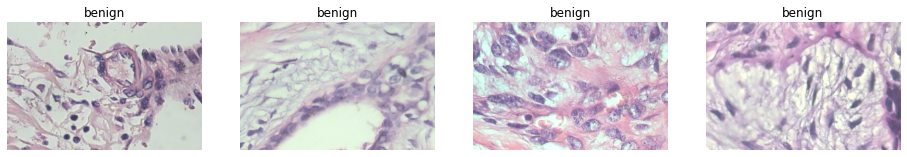

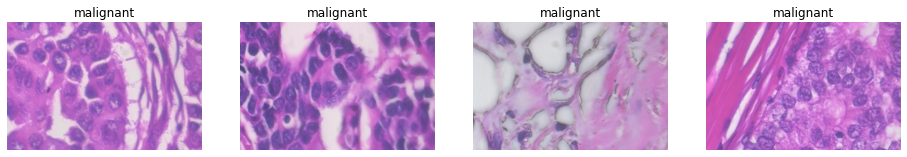

In [6]:
# hasil pengerjaan point 1.3
import matplotlib.pyplot as plt
import matplotlib.image as mping

file_train_benign=os.path.join("BreaKHis 400X/train/benign")
file_train_malignant=os.path.join("BreaKHis 400X/train/malignant")

benign_image = os.listdir(file_train_benign)
malignant_image = os.listdir(file_train_malignant)

fname1 = [os.path.join(file_train_benign,fname)
        for fname in benign_image[:4]]

fname2 = [os.path.join(file_train_malignant,fname)
        for fname in malignant_image[:4]]

ncolu = 4
nrow = 2
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname1):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('benign')
    plt.imshow(img)
plt.show()

ncolu = 4
nrow = 2
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname2):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('malignant')
    plt.imshow(img)
    
plt.show()

# 2. Preprocessing (total 15 point)

Task yang perlu dikerjakan:
1. Gather data training dan testing dengan ukuran gambar **250x250** (total 5 point)
2. Normalisasi dataset (total 5 point)
3. Membuat label encoder (total 5 point)


In [7]:
# Hasil pengerjaan point 2.1
import os
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []

train_dir=os.path.join("BreaKHis 400X/train")
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".png" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (250,250))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [8]:
# Gather data validation
test_data = []
test_label = []

testi_dir=os.path.join('BreaKHis 400X/test')
for r, d, f in os.walk(testi_dir):
    for file in f:
        if ".png" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (250,250))
            test_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            test_label.append(label)

test_data = np.array(test_data)
test_label = np.array(test_label)

In [9]:
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Test Data = ", test_data.shape)
print("Test Label = ", test_label.shape)

Train Data =  (1148, 250, 250, 3)
Train Label =  (1148,)
Test Data =  (545, 250, 250, 3)
Test Label =  (545,)


In [10]:
# hasil pengerjaan point 2.2
print("Data sebelum di-normalisasi ", train_data[0][0][0])
x_train = train_data.astype('float32') / 255.0
x_test = test_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [187 113 191]
Data setelah di-normalisasi  [0.73333335 0.44313726 0.7490196 ]


In [11]:
# hasil pengerjaan point 2.3
from sklearn.preprocessing import LabelEncoder
print("Label sebelum di-encoder ", train_label[0:8])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_test = lb.fit_transform(test_label)

print("Label setelah di-encoder ", y_train[0:8])

Label sebelum di-encoder  ['malignant' 'malignant' 'malignant' 'malignant' 'malignant' 'malignant'
 'malignant' 'malignant']
Label setelah di-encoder  [1 1 1 1 1 1 1 1]


# 3. Modelling (total 30 point)

Task yang perlu dikerjakan:
1. Membuat & menampilkan scenario Pertama (total 10 point)
2. Membuat & menampilkan summary model scenario Kedua (total 10 point)
3. Training model scenario Pertama (total 5 point)
4. Training model scenario Kedua (total 5 point)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten, GlobalMaxPooling2D, AveragePooling2D, GlobalMaxPooling2D

In [79]:
# Model Scenario Pertama
# Feature Extraction Layer
model = Sequential()

model.add(InputLayer(input_shape=[250,250,3]))
model.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(GlobalMaxPooling2D())
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(512, activation='relu'))
model2.add(Dense(256, activation='relu'))
# model.add(Dense(1, activation='softmax'))
model.add(Dense(2, activation='softmax'))

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 250, 250, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 125, 125, 16)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 63, 63, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
global_max_pooling2d_3 (Glob (None, 64)               

In [33]:
# Model Scenario Kedua
model2 = Sequential()

model2.add(InputLayer(input_shape=[250,250,3]))
model2.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(AveragePooling2D(pool_size=2, padding='same'))
model2.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(AveragePooling2D(pool_size=2, padding='same'))
model2.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(AveragePooling2D(pool_size=2, padding='same'))
model2.add(GlobalMaxPooling2D())
model2.add(Flatten())

# Fully Connected Layer
model2.add(Dense(512, activation='relu'))
model2.add(Dense(256, activation='relu'))
model2.add(Dense(2, activation='softmax'))

print(model2.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 250, 250, 16)      448       
_________________________________________________________________
average_pooling2d_3 (Average (None, 125, 125, 16)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
average_pooling2d_4 (Average (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 63, 63, 64)        18496     
_________________________________________________________________
average_pooling2d_5 (Average (None, 32, 32, 64)        0         
_________________________________________________________________
global_max_pooling2d_2 (Glob (None, 64)               

In [122]:
# Training model scenario Pertama
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
model.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy', 
              metrics=['acc'])

H = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
36/36 [==============================] - 2s 47ms/step - loss: 0.1946 - acc: 0.9242 - val_loss: 0.2823 - val_acc: 0.8899
Epoch 2/10
36/36 [==============================] - 1s 40ms/step - loss: 0.2109 - acc: 0.9068 - val_loss: 0.2764 - val_acc: 0.8826
Epoch 3/10
36/36 [==============================] - 1s 41ms/step - loss: 0.1963 - acc: 0.9120 - val_loss: 0.2711 - val_acc: 0.8899
Epoch 4/10
36/36 [==============================] - 1s 40ms/step - loss: 0.1807 - acc: 0.9294 - val_loss: 0.3115 - val_acc: 0.8642
Epoch 5/10
36/36 [==============================] - 1s 41ms/step - loss: 0.2153 - acc: 0.9103 - val_loss: 0.3173 - val_acc: 0.8624
Epoch 6/10
36/36 [==============================] - 1s 40ms/step - loss: 0.1927 - acc: 0.9242 - val_loss: 0.3649 - val_acc: 0.8220
Epoch 7/10
36/36 [==============================] - 1s 41ms/step - loss: 0.2321 - acc: 0.8963 - val_loss: 0.2804 - val_acc: 0.8917
Epoch 8/10
36/36 [==============================] - 1s 41ms/step - loss: 0.2398 - a

In [76]:
# Training model scenario Kedua
model2.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy', 
              metrics=['acc'])

H2 = model2.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
36/36 [==============================] - 2s 45ms/step - loss: 0.2344 - acc: 0.9051 - val_loss: 0.4356 - val_acc: 0.8624
Epoch 2/10
36/36 [==============================] - 1s 39ms/step - loss: 0.2149 - acc: 0.9190 - val_loss: 0.2644 - val_acc: 0.8972
Epoch 3/10
36/36 [==============================] - 1s 39ms/step - loss: 0.2142 - acc: 0.9146 - val_loss: 0.2991 - val_acc: 0.8716
Epoch 4/10
36/36 [==============================] - 1s 39ms/step - loss: 0.2788 - acc: 0.8868 - val_loss: 0.2721 - val_acc: 0.8789
Epoch 5/10
36/36 [==============================] - 1s 39ms/step - loss: 0.2031 - acc: 0.9190 - val_loss: 0.3503 - val_acc: 0.8679
Epoch 6/10
36/36 [==============================] - 1s 39ms/step - loss: 0.2215 - acc: 0.9103 - val_loss: 0.2788 - val_acc: 0.8826
Epoch 7/10
36/36 [==============================] - 1s 39ms/step - loss: 0.2295 - acc: 0.9024 - val_loss: 0.3024 - val_acc: 0.8881
Epoch 8/10
36/36 [==============================] - 1s 38ms/step - loss: 0.2223 - a

# 4. Result (total 25 point)

Task yang perlu dikerjakan:
1. Plot hasil akurasi dan loss dari kedua model menjadi 1 canvas (10 point)
2. Melakukan uji coba dari salah satu gambar test pada model 1 dan model 2 (10 point)
3. Klasifikasi report dari kedua model (5 point)
4. Jika hasil akurasi model CNN klasifikasi report kedua model diatas 90% (15 point)

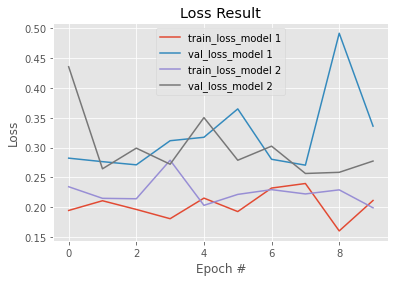

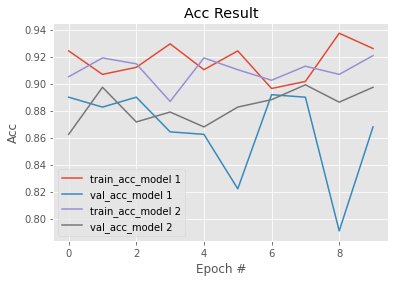

In [123]:
# Hasil pengerjaan point 4.1

%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 10), H.history["loss"], label="train_loss_model 1")
plt.plot(np.arange(0, 10), H.history["val_loss"], label="val_loss_model 1")
plt.plot(np.arange(0, 10), H2.history["loss"], label="train_loss_model 2")
plt.plot(np.arange(0, 10), H2.history["val_loss"], label="val_loss_model 2")
plt.title("Loss Result")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 10), H.history["acc"], label="train_acc_model 1")
plt.plot(np.arange(0, 10), H.history["val_acc"], label="val_acc_model 1")
plt.plot(np.arange(0, 10), H2.history["acc"], label="train_acc_model 2")
plt.plot(np.arange(0, 10), H2.history["val_acc"], label="val_acc_model 2")
plt.title("Acc Result")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [19]:
# Hasil pengerjaan point 4.2

In [124]:
# Hasil pengerjaan point 4.3
from sklearn.metrics import classification_report

target_names = ['benign', 'malignant']

pred = model.predict_classes(x_test)
labels1 = (pred > 0.5).astype(np.int)
print('model 1')
print(classification_report(y_test,  labels1, target_names=target_names))

pred2 = model2.predict_classes(x_test)
labels2 = (pred2 > 0.5).astype(np.int)
print('model 2')
print(classification_report(y_test, labels2, target_names=target_names))

model 1
              precision    recall  f1-score   support

      benign       0.91      0.65      0.76       176
   malignant       0.85      0.97      0.91       369

    accuracy                           0.87       545
   macro avg       0.88      0.81      0.84       545
weighted avg       0.87      0.87      0.86       545

model 2
              precision    recall  f1-score   support

      benign       0.91      0.76      0.83       176
   malignant       0.89      0.96      0.93       369

    accuracy                           0.90       545
   macro avg       0.90      0.86      0.88       545
weighted avg       0.90      0.90      0.89       545

